### Import necessary libraries and utility modules

In [1]:
# import the packages
from loader_util.nn.conv import LeNet
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
sns.set()

### Here we load the MNIST dataset from the Keras repositories.

In [2]:
# grab the MNIST dataset 
print("[INFO] Accessing MNIST")
(trainData, trainLabels), (testData, testLabels) =  mnist.load_data()
print(testData.shape)

[INFO] Accessing MNIST
(10000, 28, 28)


### Change channel infrastructure

In [3]:
#if using channel first make sure shape of image is right
if K.image_data_format() == 'channel_first':
    trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
    testData = testData.reshape((testData.shape[0], 1, 28, 28))
else:
    trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
    testData = testData.reshape((testData.shape[0], 28, 28, 1))

### Scaling input data and vectorizing  the output labels

In [4]:
# now scale the data to the range [0-1]
trainData = trainData.astype('float32') / 255.0
testData = testData.astype('float32') / 255.0

# convert labels from integers to vectors
le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)

### Compiling model and training for 20 epochs

In [5]:
# initialise the optimier and the model
print("[INFO] compiling model.....")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])
H = model.fit(trainData, trainLabels,
              validation_data=(testData, testLabels),
              batch_size=128, epochs=20, verbose=1)

[INFO] compiling model.....
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 45s 754us/sample - loss: 0.9164 - accuracy: 0.7609 - val_loss: 0.2958 - val_accuracy: 0.9124

In [7]:
# evaluate the network
print("[INFO] evaluating network")
preds = model.predict(testData, batch_size=128)

epochs = range(1,21)
loss = H.history['loss']
accuracy = H.history['accuracy']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_accuracy']
plot_df = pd.DataFrame(data=np.c_[epochs,loss,accuracy,val_loss,val_accuracy], 
                       columns=['epochs','loss', 'accuracy', 'val_loss', 'val_accuracy'])

[INFO] evaluating network


### Plot the loss and accuracy trends

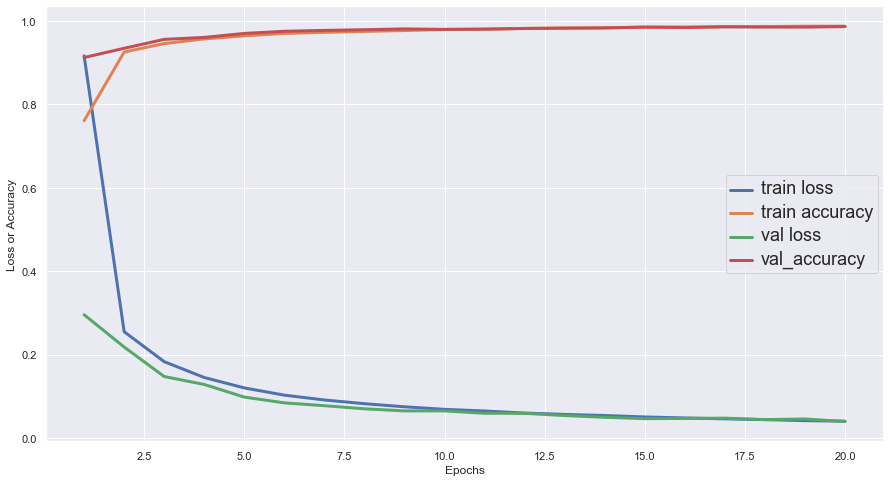

In [8]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text